In [1]:
print("hello")

hello


In [2]:
conda intall -c conda -forge shap


CommandNotFoundError: No command 'conda intall'.
Did you mean 'conda install'?


Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c conda -forge shop

usage: conda install [-h] [--revision REVISION] [-n ENVIRONMENT | -p PATH]
                     [-c CHANNEL] [--use-local] [--override-channels]
                     [--repodata-fn REPODATA_FNS] [--strict-channel-priority]
                     [--no-channel-priority] [--no-deps | --only-deps]
                     [--no-pin] [--copy] [-C] [-k] [--offline] [-d] [--json]
                     [-q] [-v] [-y] [--download-only] [--show-channel-urls]
                     [--file FILE]
                     [--solver {classic} | --experimental-solver {classic}]
                     [--force-reinstall]
                     [--freeze-installed | --update-deps | -S | --update-all | --update-specs]
                     [-m] [--clobber] [--dev]
                     [package_spec ...]
conda install: error: argument -f/--force: ignored explicit argument 'orge'

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Note: you may need to restart the kernel to use updated packages.


In [5]:
import shap
X,y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)
feature_names = list(X.columns)
feature_names

['Age',
 'Workclass',
 'Education-Num',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital Gain',
 'Capital Loss',
 'Hours per week',
 'Country']

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581646,3.868892,10.080679,2.611836,6.572740,2.494518,3.665858,0.669205,1077.648804,87.303833,40.437454,36.718866
std,13.640442,1.455960,2.572562,1.506222,4.228857,1.758232,0.848806,0.470506,7385.911621,403.014771,12.347933,7.823782
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000
50%,37.000000,4.000000,10.000000,2.000000,7.000000,3.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000
75%,48.000000,4.000000,12.000000,4.000000,10.000000,4.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000
max,90.000000,8.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


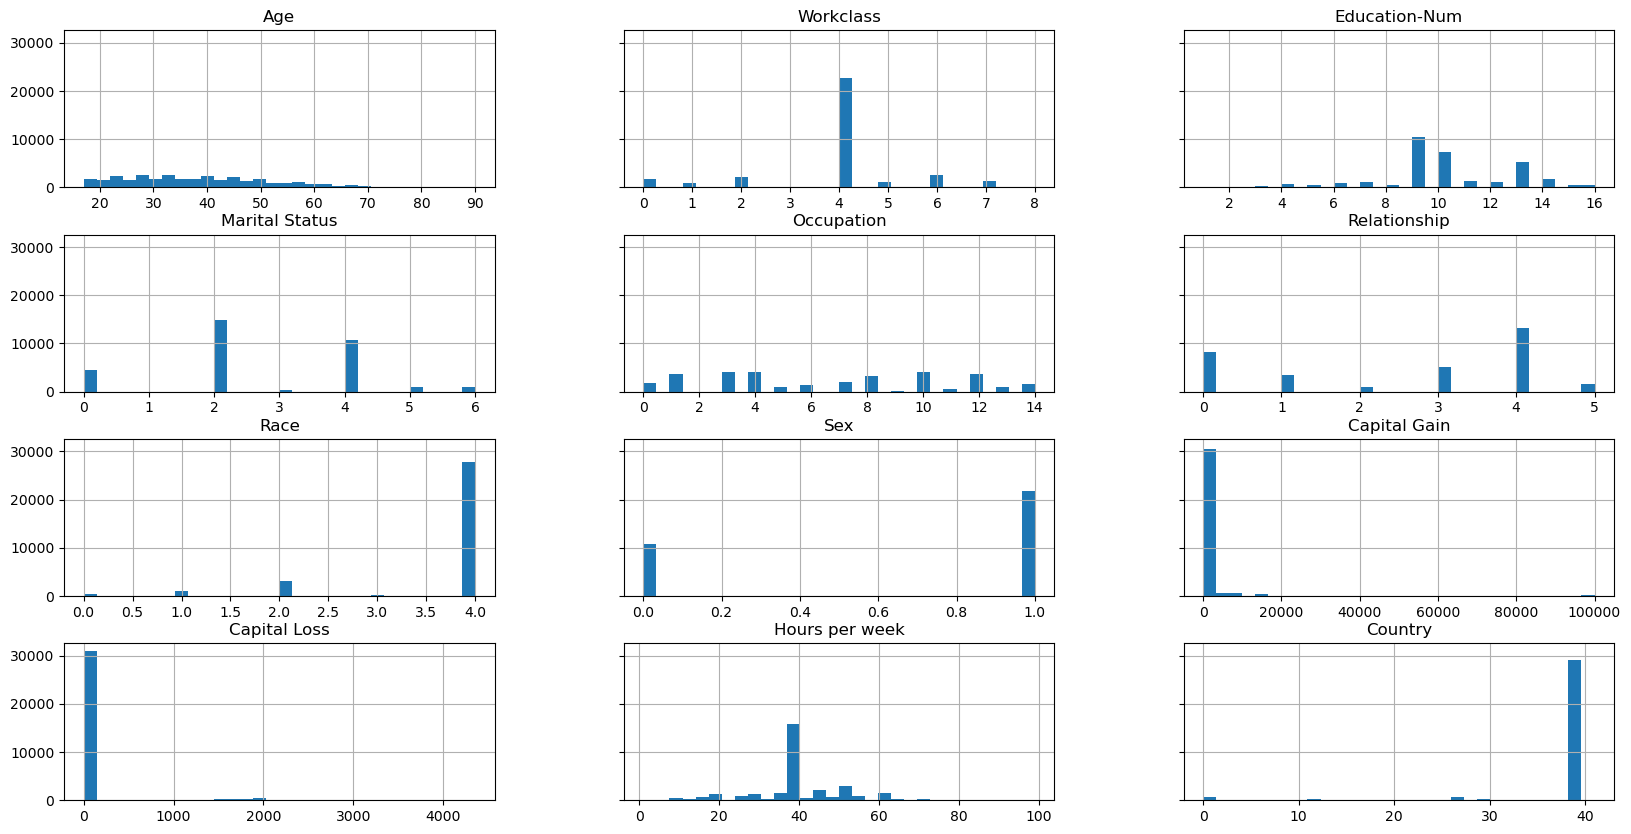

In [7]:
display(X.describe())
hist = X.hist(bins=30, sharey=True, figsize=(20,10))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state =1)
X_train_display = X_display.loc[X_train.index]
X_train.shape

(26048, 12)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25, random_state= 1)
X_train_display = X_display.loc[X_train.index]
X_val_display = X_display.loc[X_val.index]
X_val.shape

(6512, 12)

In [8]:
import pandas as pd
train = pd.concat([pd.Series(y_train, index=X_train.index,
                             name='Income>50k', dtype = int),X_train],axis=1)
validation = pd.concat([pd.Series(y_val, index=X_val.index,
                       name='Income>50k', dtype=int), X_val], axis=1)
test = pd.concat([pd.Series(y_test, index=X_test.index,
                 name='Income>50k', dtype=int), X_test], axis=1)


In [9]:
train.shape

(19536, 13)

In [10]:
validation.shape

(6512, 13)

In [11]:
test.shape

(6513, 13)

In [12]:
X_test.shape

(6513, 12)

In [13]:
train.to_csv('test_train.csv', index=False, header=False)
validation.to_csv('validation.csv',index=False,header=False)

In [14]:
new_dataframe = pd.DataFrame(X_train)
new_dataframe.shape
train.to_csv('X_train.csv', index=False, header=False)
validation.to_csv('X_val.csv',index=False,header=False)
test.to_csv('X_test.csv',index=False,header=False)

In [15]:
import pandas as pd

# Read CSV file
data = pd.read_csv('X_train.csv')

# Open the output LIBSVM file
output_file = open('output1.libsvm', 'w')

# Iterate over each row in the DataFrame
for index, row in data.iterrows():
    # Extract the label
    label = row[0]
    
    # Convert features (excluding the label) to LIBSVM format
    libsvm_features = ' '.join([f"{i}:{val}" for i, val in enumerate(row[1:], start=1)])
    
    # Write the converted data to the output file
    output_file.write(f"{label} {libsvm_features}\n")

# Close the output file
output_file.close()

In [16]:
bucket =  "mysalarydatabucket-176663557263"
prefix = "demo-sagemaker-xgboost-adult-income-prediction"

In [17]:
import pandas as pd

# Read CSV file
data = pd.read_csv('X_val.csv')

# Open the output LIBSVM file
output_file = open('validation_output1.libsvm', 'w')

# Iterate over each row in the DataFrame
for index, row in data.iterrows():
    # Extract the label
    label = row[0]
    
    # Convert features (excluding the label) to LIBSVM format
    libsvm_features = ' '.join([f"{i}:{val}" for i, val in enumerate(row[1:], start=1)])
    
    # Write the converted data to the output file
    output_file.write(f"{label} {libsvm_features}\n")

# Close the output file
output_file.close()

In [18]:
import sagemaker, boto3, os
bucket =  "mysalarydatabucket-176663557263"
prefix = "demo-sagemaker-xgboost-adult-income-prediction"

boto3.Session().resource('s3').Bucket(bucket).Object(
            os.path.join(prefix, 'data/output1.libsvm')).upload_file('output1.libsvm')
boto3.Session().resource('s3').Bucket(bucket).Object(
            os.path.join(prefix, 'data/validation_output1.libsvm')).upload_file('validation_output1.libsvm')

In [19]:
! aws s3 ls {bucket}/{prefix}/data --recursive

2023-06-24 16:54:56    1626251 demo-sagemaker-xgboost-adult-income-prediction/data/output1.libsvm
2023-06-24 16:54:57     542056 demo-sagemaker-xgboost-adult-income-prediction/data/validation_output1.libsvm


In [20]:
import sagemaker

region = sagemaker.Session().boto_region_name
print("AWS Region: {}".format(region))

role = sagemaker.get_execution_role()
print("Role_ARN: {}".format(role))



AWS Region: us-east-1
Role_ARN: arn:aws:iam::176663557263:role/service-role/AmazonSageMakerServiceCatalogProductsUseRole


In [21]:
sagemaker.__version__

'2.164.0'

In [22]:
from sagemaker.debugger import Rule,rule_configs
from sagemaker.session import TrainingInput

s3_output_location="s3://{}/{}/{}".format(bucket, prefix, "xgboost_model")

container=sagemaker.image_uris.retrieve("xgboost", region , "1.2-1")
print(container)

xgb_model=sagemaker.estimator.Estimator(
     image_uri=container,
     role=role,
     instance_count=1,
     instance_type='ml.m5.4xlarge',
     volume_size=5,
     output_path=s3_output_location,
     sagemaker_session=sagemaker.Session(),
     rules=[Rule.sagemaker(rule_configs.create_xgboost_report())]
    
)

683313688378.dkr.ecr.us-east-1.amazonaws.com/sagemaker-xgboost:1.2-1


In [23]:
xgb_model.set_hyperparameters(
     max_depth=5,
     eta=0.2,
     gamma=4,
     min_child_weight = 6,
     subsample=0.7,
     objective = "binary:logistic",
     num_round = 1000
)

In [24]:
from sagemaker.session import TrainingInput

train_input = TrainingInput(

    "s3://mysalarydatabucket-176663557263/demo-sagemaker-xgboost-adult-income-prediction/data/output1.libsvm"
)

validation_input = TrainingInput(
    "s3://mysalarydatabucket-176663557263/demo-sagemaker-xgboost-adult-income-prediction/data/validation_output1.libsvm"
    
)



In [25]:
xgb_model.fit({"train" : train_input, "validation" : validation_input}, wait = True)

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2023-06-24-16-55-49-496


2023-06-24 16:55:49 Starting - Starting the training job...
2023-06-24 16:56:06 Starting - Preparing the instances for trainingCreateXgboostReport: InProgress
......
2023-06-24 16:57:14 Downloading - Downloading input data......
2023-06-24 16:58:14 Training - Training image download completed. Training in progress.[2023-06-24 16:58:11.360 ip-10-0-95-143.ec2.internal:7 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Single node training.
[2023-06-24 16:58:11.445 ip-10-0-95-143.ec2.internal:7 INFO json_config.py:91] Creating hook from json_config at /opt/ml/input/config/debughookconfig.json.
[2023-06-24 16:58:11.

In [26]:
rule_output_path = xgb_model.output_path + "/" + "sagemaker-xgboost-2023-05-15-11-19-32-487" + "/rule-output"
! aws s3 ls {rule_output_path} --recursive


In [27]:
! aws s3 cp {rule_output_path} ./ --recursive

In [28]:
from IPython.display import FileLink, FileLinks
display(("Click Link below to view the XGBoost Training Report"), FileLink("CreateXgboostReport/xgboost_report.html"))

'Click Link below to view the XGBoost Training Report'

/home/ec2-user/SageMaker/CreateXgboostReport/xgboost_report.html

In [29]:
xgb_model.model_data

's3://mysalarydatabucket-176663557263/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2023-06-24-16-55-49-496/output/model.tar.gz'

In [30]:
import sagemaker
#from sagemaker.predictor import csv_serializer
from sagemaker.serializers import CSVSerializer
xgb_predictor=xgb_model.deploy(
    initial_instance_count=1,
    instance_type = 'ml.m5.4xlarge',
    serializer=CSVSerializer()
)

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2023-06-24-17-02-52-013
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2023-06-24-17-02-52-013
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2023-06-24-17-02-52-013


-----!

In [31]:
xgb_predictor.endpoint_name

'sagemaker-xgboost-2023-06-24-17-02-52-013'

In [66]:
import numpy as np
def predict(data, rows=1000):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = ''
    for array in split_array:
        predictions = ','.join([predictions, xgb_predictor.predict(array).decode('utf-8')])
        print(predictions)
    return np.fromstring(predictions[1:], sep=',')

In [138]:
# Testing predictions on samples of test data

num_sample=6513

import matplotlib.pyplot as plt


predictions=xgb_predictor.predict(X_test[: num_sample].to_numpy())
predictions


b'0.001856124959886074,0.027634140104055405,0.020009495317935944,0.03428497165441513,0.01575186662375927,0.03428497165441513,0.025126373395323753,0.007034198381006718,0.03428497165441513,0.005176011472940445,0.05158926546573639,0.018443752080202103,0.03428497165441513,0.018443752080202103,0.018443752080202103,0.00518264714628458,0.0033817014191299677,0.03428497165441513,0.0010603099362924695,0.01575186662375927,0.02106509357690811,0.0781516283750534,0.061655815690755844,0.004775918088853359,0.017563804984092712,0.013373903930187225,0.0031151447910815477,0.013439850881695747,0.0040556262247264385,0.009667695499956608,0.013373903930187225,0.018002890050411224,0.01575186662375927,0.013662759214639664,0.04413717985153198,0.01165747083723545,0.011376780457794666,0.018443752080202103,0.02398577891290188,0.016331516206264496,0.007034198381006718,0.007010108791291714,0.013373903930187225,0.03428497165441513,0.0696442648768425,0.0040556262247264385,0.005176011472940445,0.018002890050411224,0.01

In [169]:
predictions_str = predictions.decode('utf-8')  # Decode the byte string to a regular string
predictions_list = predictions_str.split(',')  # Split the string on commas to get individual predicted values

# Convert the predicted values to float
predictions_float = [float(pred) for pred in predictions_list]


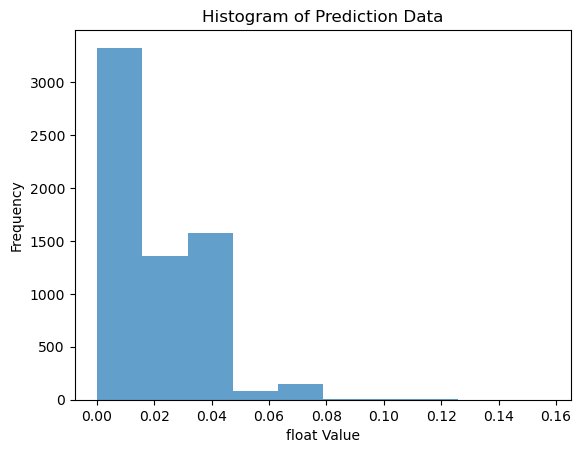

In [140]:
# Plot the histogram
plt.hist(predictions_float, alpha=0.7)
plt.xlabel('float Value')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Data')
plt.show()

In [170]:
import sklearn

cutoff = 0.005

# Assuming you have the test data in a DataFrame named 'test'
true_labels = test.iloc[:num_sample, 0]

# Create predicted labels based on the cutoff
predicted_labels = [1 if pred > cutoff else 0 for pred in predictions_float]



## Confusion Matrix

In [174]:
# Compute the confusion matrix
confusion_matrix = sklearn.metrics.confusion_matrix(true_labels, predicted_labels)
print(confusion_matrix)

[[ 753 4273]
 [ 163 1324]]


## Classification Report

In [175]:
# Compute the classification report
classification_report = sklearn.metrics.classification_report(true_labels, predicted_labels)
print(classification_report)


              precision    recall  f1-score   support

           0       0.82      0.15      0.25      5026
           1       0.24      0.89      0.37      1487

    accuracy                           0.32      6513
   macro avg       0.53      0.52      0.31      6513
weighted avg       0.69      0.32      0.28      6513



## Display prediction on few sample data

In [176]:
print("1st 3 Adult details: ")
samples=test.iloc[:3]
samples

1st 3 Adult details: 


,Income>50k,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
9646,0,62.0,6,4.0,6,8,0,4,0,0.0,0.0,66.0,39
709,0,18.0,4,7.0,4,8,2,4,1,0.0,0.0,25.0,39
7385,1,25.0,4,13.0,4,5,3,4,1,27828.0,0.0,50.0,39


In [152]:
predicted_labels[:3]

[0, 1, 1]

In [168]:
for idx,s in enumerate(samples.iterrows()):
    print('\n')
    print("The adult's True  ",s[1])
    print("The adult's Predicted Income> 50 k : ",predicted_labels[idx])




The adult's True   Income>50k         0.0
Age               62.0
Workclass          6.0
Education-Num      4.0
Marital Status     6.0
Occupation         8.0
Relationship       0.0
Race               4.0
Sex                0.0
Capital Gain       0.0
Capital Loss       0.0
Hours per week    66.0
Country           39.0
Name: 9646, dtype: float64
The adult's Predicted Income> 50 k :  0


The adult's True   Income>50k         0.0
Age               18.0
Workclass          4.0
Education-Num      7.0
Marital Status     4.0
Occupation         8.0
Relationship       2.0
Race               4.0
Sex                1.0
Capital Gain       0.0
Capital Loss       0.0
Hours per week    25.0
Country           39.0
Name: 709, dtype: float64
The adult's Predicted Income> 50 k :  1


The adult's True   Income>50k            1.0
Age                  25.0
Workclass             4.0
Education-Num        13.0
Marital Status        4.0
Occupation            5.0
Relationship          3.0
Race                  4.